In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch_sampling import choice

# Checking non-contiguous tensors

In [2]:
x = torch.arange(10)
y = x[::3]
for t in [x, y]:
    print(t.is_contiguous())

True
False


In [3]:
k=3
print("Sampling with replacement:")
for _ in range(5):
    print(choice(y, k, True))
print("Sampling without replacement:")
for _ in range(5):
    print(choice(y, k, False))

Sampling with replacement:
tensor([3, 3, 9])
tensor([3, 9, 3])
tensor([3, 9, 3])
tensor([0, 3, 6])
tensor([9, 3, 6])
Sampling without replacement:
tensor([0, 3, 6])
tensor([0, 3, 6])
tensor([0, 3, 6])
tensor([0, 3, 9])
tensor([0, 3, 9])


In [4]:
x = torch.arange(10).cuda()
y = x[::3]
for t in [x, y]:
    print(t.is_contiguous())

True
False


In [5]:
k=3
print("Sampling with replacement:")
for _ in range(5):
    print(choice(y, k, True))
print("Sampling without replacement:")
for _ in range(5):
    print(choice(y, k, False))

Sampling with replacement:
tensor([0, 0, 9], device='cuda:0')
tensor([3, 3, 9], device='cuda:0')
tensor([3, 6, 6], device='cuda:0')
tensor([0, 3, 9], device='cuda:0')
tensor([3, 0, 9], device='cuda:0')
Sampling without replacement:
tensor([0, 3, 6], device='cuda:0')
tensor([9, 3, 6], device='cuda:0')
tensor([0, 3, 9], device='cuda:0')
tensor([0, 9, 6], device='cuda:0')
tensor([0, 3, 9], device='cuda:0')


# Checking determinism

In [6]:
x = torch.arange(10)
k=3
for _ in range(5):
    torch.manual_seed(1234)
    print(choice(x, k, True))

tensor([5, 1, 6])
tensor([5, 1, 6])
tensor([5, 1, 6])
tensor([5, 1, 6])
tensor([5, 1, 6])


In [7]:
x = torch.arange(10).cuda()
for _ in range(5):
    torch.manual_seed(1234)
    print(choice(x, k, True))

tensor([5, 1, 9], device='cuda:0')
tensor([5, 1, 9], device='cuda:0')
tensor([5, 1, 9], device='cuda:0')
tensor([5, 1, 9], device='cuda:0')
tensor([5, 1, 9], device='cuda:0')


# Benchmarks against NumPy - Uniform

In [8]:
x = torch.arange(10**4)
x_np = x.numpy()

In [9]:
k=9000
%timeit choice(x, k, True)
%timeit np.random.choice(x_np, k, True)
%timeit choice(x, k, False)
%timeit np.random.choice(x_np, k, False)

95.4 µs ± 489 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
126 µs ± 1.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
48.4 µs ± 675 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
138 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
k=100
%timeit choice(x, k, True)
%timeit np.random.choice(x_np, k, True)
%timeit choice(x, k, False)
%timeit np.random.choice(x_np, k, False)

5.71 µs ± 15.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
17.3 µs ± 73.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
14.4 µs ± 102 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
130 µs ± 2.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
k=4500
%timeit choice(x, k, True)
%timeit np.random.choice(x_np, k, True)
%timeit choice(x, k, False)
%timeit np.random.choice(x_np, k, True)

53.2 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
71.9 µs ± 152 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
72.5 µs ± 93.6 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
71.7 µs ± 258 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Benchmarks against NumPy - Weighted

In [12]:
weights = torch.rand(10**4)
weights /= weights.sum()
weights_np = weights.numpy()

In [13]:
k=9000
%timeit choice(x, k, True, weights)
%timeit np.random.choice(x_np, k, True, weights_np)
%timeit choice(x, k, False, weights)
%timeit np.random.choice(x_np, k, False, weights_np)

773 µs ± 1.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
872 µs ± 1.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
373 µs ± 999 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.92 ms ± 6.24 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
k=4500
%timeit choice(x, k, True, weights)
%timeit np.random.choice(x_np, k, True, weights_np)
%timeit choice(x, k, False, weights)
%timeit np.random.choice(x_np, k, False, weights_np)

407 µs ± 4.78 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
495 µs ± 8.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
295 µs ± 600 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.27 ms ± 4.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
k=100
%timeit choice(x, k, True, weights)
%timeit np.random.choice(x_np, k, True, weights_np)
%timeit choice(x, k, False, weights)
%timeit np.random.choice(x_np, k, False, weights_np)

43.7 µs ± 536 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
110 µs ± 903 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
235 µs ± 3.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
172 µs ± 2.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Check performance for multi-d tensors

In [16]:
x = torch.arange(10**4).view(-1, 2)
n = x.size(0)
k = 3
idx = torch.arange(n)

In [17]:
%timeit x[torch.randperm(n)[:k]]
%timeit x[choice(idx, k, True)]
%timeit x[choice(idx, k, False)]

70.8 µs ± 1.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
12.1 µs ± 103 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
19 µs ± 172 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Checking the performance

In [18]:
x = torch.arange(10**4)

# Case 1: k big

In [19]:
k = 9000
%timeit choice(x, k, True)
%timeit choice(x, k, False)
%timeit x[torch.randperm(x.numel())[:k]]

95.4 µs ± 75.5 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
45.8 µs ± 56.6 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
167 µs ± 3.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Case 2: k small

In [20]:
k = 100
%timeit choice(x, k, True)
%timeit choice(x, k, False)
%timeit x[torch.randperm(x.numel())[:k]]

5.79 µs ± 5.46 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
14.3 µs ± 16.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
130 µs ± 209 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Case 3: k medium

In [21]:
k = 4500
%timeit choice(x, k, True)
%timeit choice(x, k, False)
%timeit x[torch.randperm(x.numel())[:k]]

52.5 µs ± 32.5 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
72.9 µs ± 681 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
151 µs ± 389 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# CUDA vs CPU

In [22]:
x_cpu = torch.arange(10**7)
x_cuda = x_cpu.cuda()
k = 10**4

In [23]:
%timeit choice(x_cpu, k, True)
%timeit choice(x_cuda, k, True);torch.cuda.synchronize()

208 µs ± 1.61 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
27.1 µs ± 269 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [24]:
%timeit choice(x_cpu, k, False)
%timeit choice(x_cuda, k, False);torch.cuda.synchronize()

6.87 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.33 ms ± 2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
weights_cpu = torch.ones(10**7).double()
weights_cuda = weights_cpu.cuda()

In [26]:
%timeit choice(x_cpu, k, False, weights_cpu)
%timeit choice(x_cuda, k, False, weights_cuda);torch.cuda.synchronize()

335 ms ± 4.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
84 ms ± 618 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Checking distributions - Uniform

In [27]:
x = torch.arange(10)

### CPP Extension

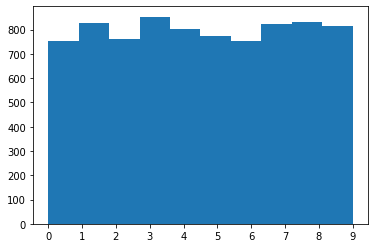

In [28]:
k = 8
samples = []
for _ in range(1000):
    samples.extend(choice(x, k, True).numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

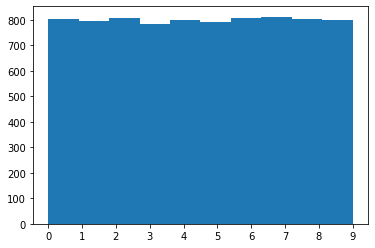

In [29]:
k = 8
samples = []
for _ in range(1000):
    samples.extend(choice(x, k, False).numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

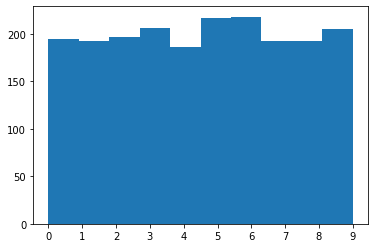

In [30]:
k = 2
samples = []
for _ in range(1000):
    samples.extend(choice(x, k, True).numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

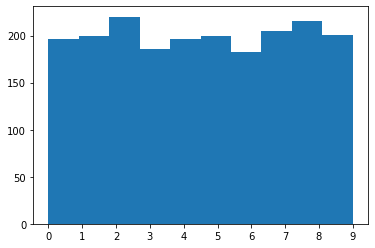

In [31]:
k = 2
samples = []
for _ in range(1000):
    samples.extend(choice(x, k, False).numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

### CUDA Extension

In [32]:
x = x.cuda()

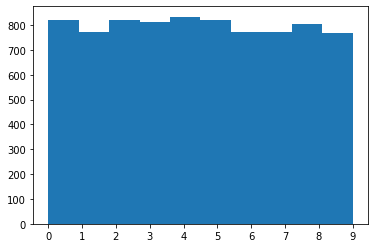

In [33]:
k = 8
samples = []
for _ in range(1000):
    samples.extend(choice(x, k,True).cpu().numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

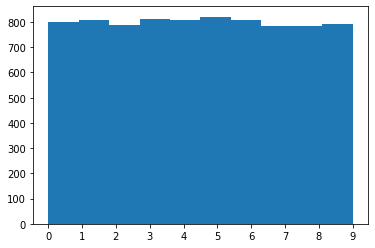

In [34]:
k = 8
samples = []
for _ in range(1000):
    samples.extend(choice(x, k, False).cpu().numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

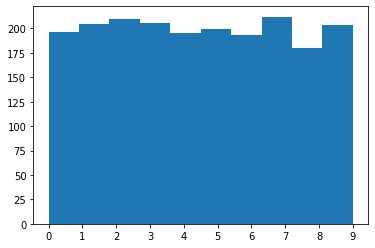

In [35]:
k = 2
samples = []
for _ in range(1000):
    samples.extend(choice(x, k, True).cpu().numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

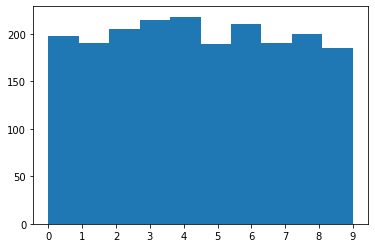

In [36]:
k = 2
samples = []
for _ in range(1000):
    samples.extend(choice(x, k, False).cpu().numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

# Checking distributions - Weighted

In [37]:
x = torch.arange(10)
weights = torch.Tensor([1, 1, 5, 5, 5, 1, 7, 2, 2, 2]).float()

### CPP Extension

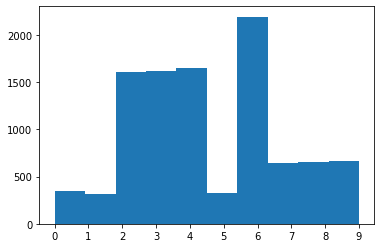

In [38]:
k = 1
samples = []
for _ in range(10000):
    samples.extend(choice(x, k, True, weights).cpu().numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

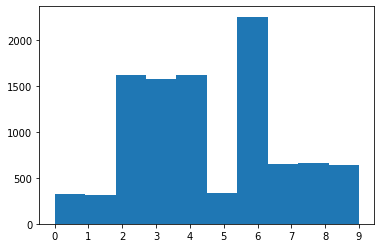

In [39]:
k = 1
samples = []
for _ in range(10000):
    samples.extend(choice(x, k, False, weights).cpu().numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

### CUDA Extension

In [40]:
x = x.cuda()
weights = weights.cuda()

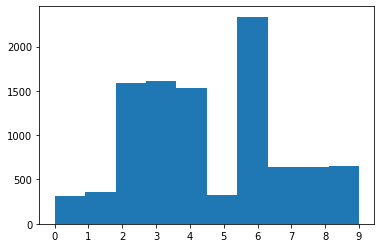

In [41]:
k = 1
samples = []
for _ in range(10000):
    samples.extend(choice(x, k, True, weights).cpu().numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

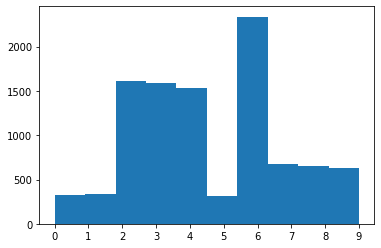

In [42]:
k = 1
samples = []
for _ in range(10000):
    samples.extend(choice(x, k, False, weights).cpu().numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()